# CSE 6240 - Web Search & Text Mining - Project 2

In [1]:
# __author__ = 'Bhanu Verma', 'Nilaksh Das'
# GTid = '903151012', '903129996'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from scipy.linalg import svd
import os, os.path
from PIL import Image
import random
from sklearn.linear_model import orthogonal_mp
import time
from matplotlib.pyplot import imshow
import math
%matplotlib inline

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

This section of code loads up all the files from all the categories instead of just two categories. This code basically takes up the input as an image index and plots the original and compressed image side by side. We also calculate the PSNR(Peak Signal to Noise Ratio) values. Higher the PSNR value, better is the compression quality.

In [4]:
categoryArr = []
animalPath = 'Data/Animal'
fungusPath = 'Data/Fungus'
geoPath = 'Data/Geological Formation'
personPath = 'Data/Person'
plantPath = 'Data/Plant, flora, plant life'
sportPath = 'Data/Sport'

# animal:0, fungus:1, geo:2, person:3, plant:4, sport:5
categoryArr = [animalPath, fungusPath, geoPath, personPath, plantPath, sportPath]

In [5]:
def ksvd(Y, K, T, D=None, max_err=0, max_iter=10):
    (row_size, col_size) = Y.shape

    if D is None:
        D = np.random.rand(row_size, K)
        
    # normalize dictionary
    for i in range(K):
        D[:,i] /= norm(D[:,i])
    
    err = np.inf
    iter_val = 0
    X = np.zeros((K,row_size))
    
    while iter_val < max_iter and err > max_err:
        X = orthogonal_mp(D, Y, T, max_err)

        atoms_pos =[]
        for x in range(K):
            atoms_pos.append(x)
    
        np.random.shuffle(atoms_pos)

        redund_atoms = []

        for (i, j) in zip(atoms_pos, range(K)):
            # find non-zero values
            nonzero_x = np.nonzero(X[i,:])[0]
        
            if len(nonzero_x) == 0:
                redund_atoms.append(i)
                continue

            X[i,nonzero_x] = 0
            res_err = Y[:,nonzero_x] - np.dot(D,X[:,nonzero_x])

            # dictionary and weights are updated here
            U, s, Vt = svd(res_err)
            D[:,i] = U[:,0]
            X[i,nonzero_x] = s[0]*Vt.T[:,0]

        err_repr = Y - np.dot(D,X)
        err_repr_norm = (norm(err_repr[:,n]) for n in range(col_size))

        indices = sorted(zip(err_repr_norm, range(col_size)), reverse=True)

        for (redund_ind, tuple_err) in zip(redund_atoms, indices):
            (err, err_indices) = tuple_err

            d = Y[:,err_indices].copy()
            d -= mean(d)
            d /= norm(d)
            D[:,redund_ind] = d


        err_repr_norm = [norm(err_repr[:,n]) for n in range(col_size)]
        err = max(err_repr_norm)

        iter_val += 1
    
    return D,X

In [6]:
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

In [7]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
def calculate_KSVD_for_Image(img_arr,k):
    try:
        D,X = ksvd(img_arr, k, None, D=None, max_err=0, max_iter=20)
    except:
        print("SVD error")
        D = 'Error'
        X = 'Error'

    return D,X

In [9]:
def get_image_for_index(index, mapper):
    filepath = mapper[index]
    img = Image.open(filepath)
    img_size = tuple([int(x) for x in img.size])
    img = img.resize(img_size)
    img = img.convert('L')
    img_arr = np.array(img)
    img_arr = img_arr/255.0
    
    return img_arr

In [10]:
def plot_images(before, after):
    plt.figure(i, figsize=(20, 7))

    plt.subplot(1,2,1)
    imshow(before, cmap = plt.get_cmap('gray'))

    plt.subplot(1,2,2)
    imshow(after, cmap = plt.get_cmap('gray'))

    plt.show()

    print('PSNR Value is: ', psnr(np.asarray(before),after))

In [11]:
def run_svd(index_to_name, index, total_count,k):
    if index < 0 or index >= total_count:
        print('Error: Index out of range')
    else:
        input_img = get_image_for_index(index, index_to_name)
        D,X = calculate_KSVD_for_Image(input_img,k)

        if D == 'Error' or X == 'Error':
            print('Error Occurred')
        else:
            reconst_img = np.dot(D,X)
            reconst_img = reconst_img * 255.0
            input_img = input_img * 255.0
            plot_images(input_img, reconst_img)

# Few Examples

In [12]:
count = 0
name_dict = {}

for a,category in enumerate(categoryArr):
    dirList = os.listdir(category)

    for i,fname in enumerate(dirList):
        img_path = category+'/'+fname
        name_dict[count] = img_path
        count+=1

In [13]:
print(count)

8987


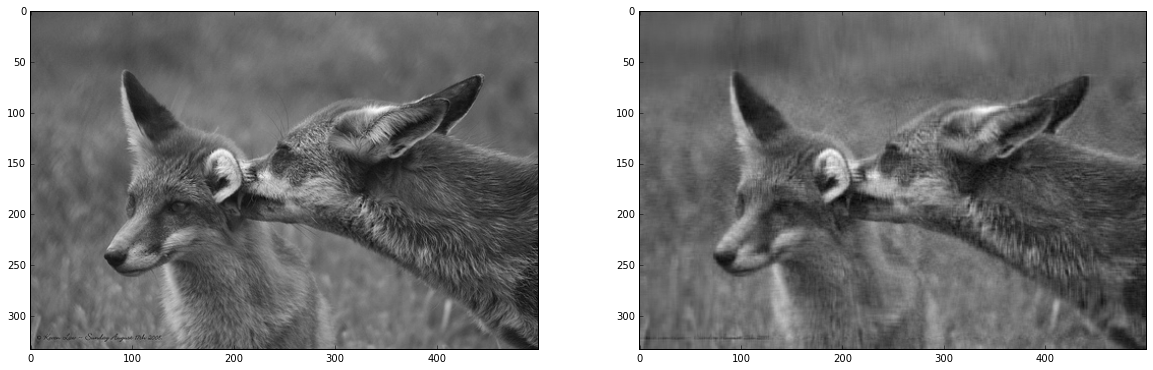

PSNR Value is:  31.27752676308059


In [14]:
run_svd(name_dict,0,count,50)

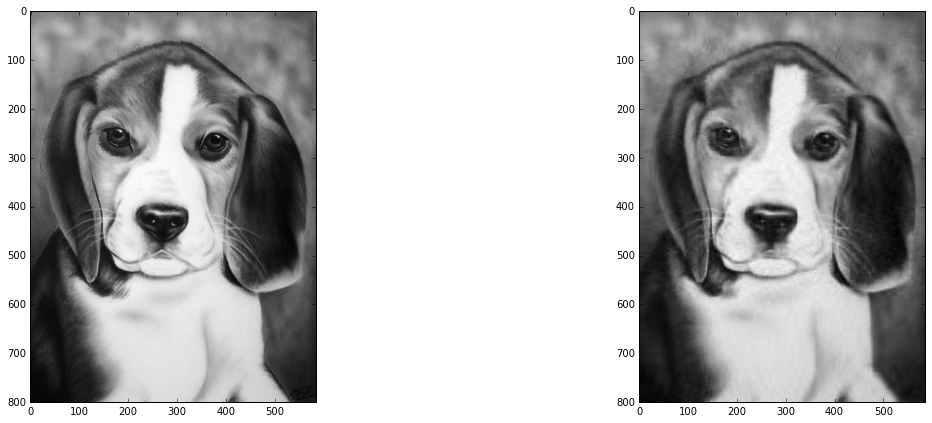

PSNR Value is:  35.413812183236


In [15]:
run_svd(name_dict,4,count,50)

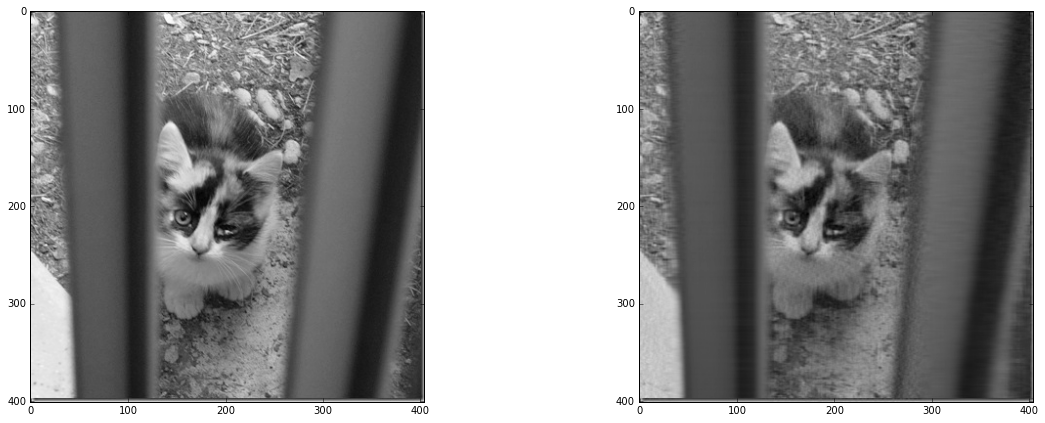

PSNR Value is:  31.23983397979259


In [16]:
run_svd(name_dict,1000,count,50)

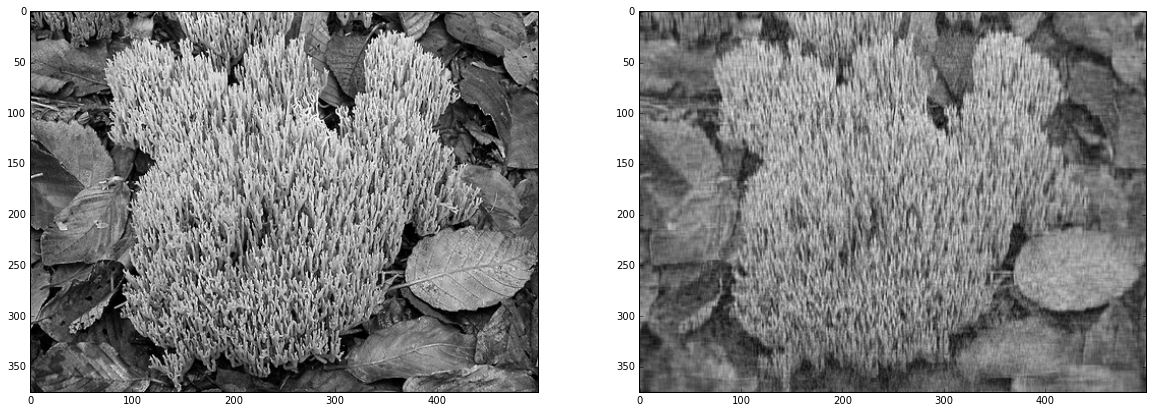

PSNR Value is:  19.409738184260167


In [17]:
run_svd(name_dict,2000,count,50)

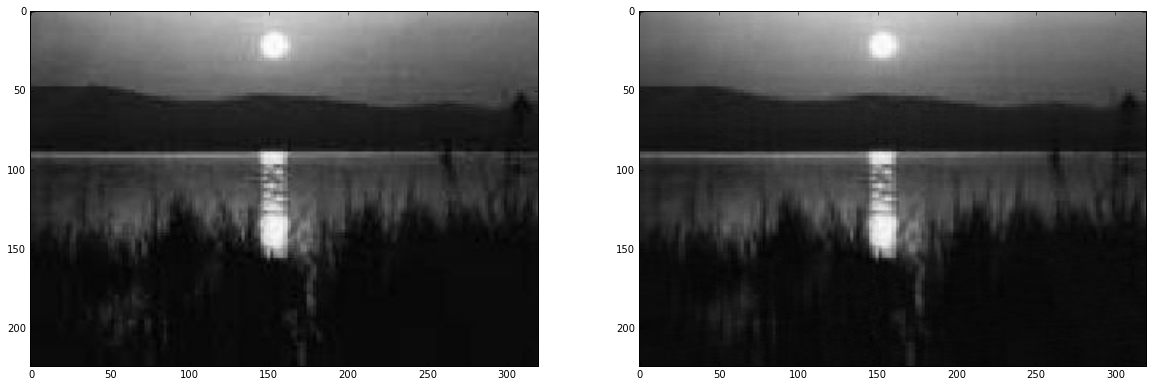

PSNR Value is:  41.58021973401659


In [18]:
run_svd(name_dict,3000,count,50)

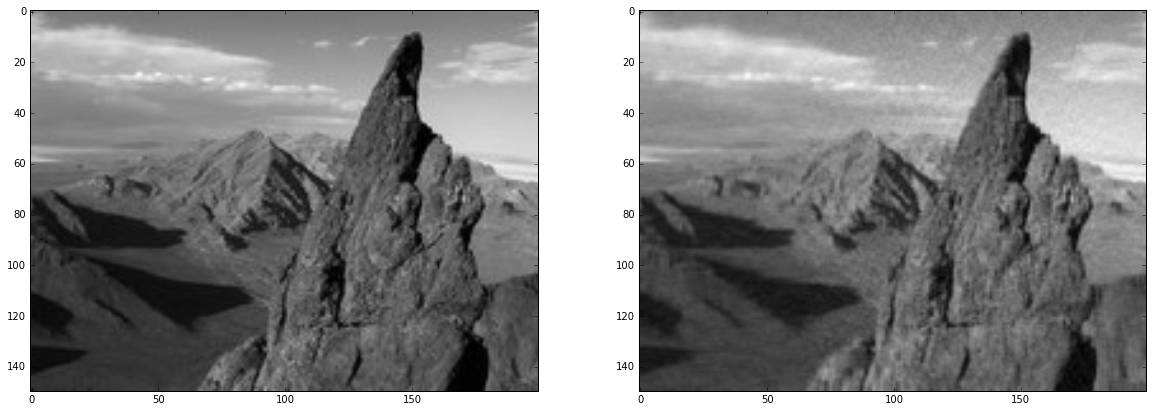

PSNR Value is:  33.542590721008885


In [19]:
run_svd(name_dict,4000,count,50)

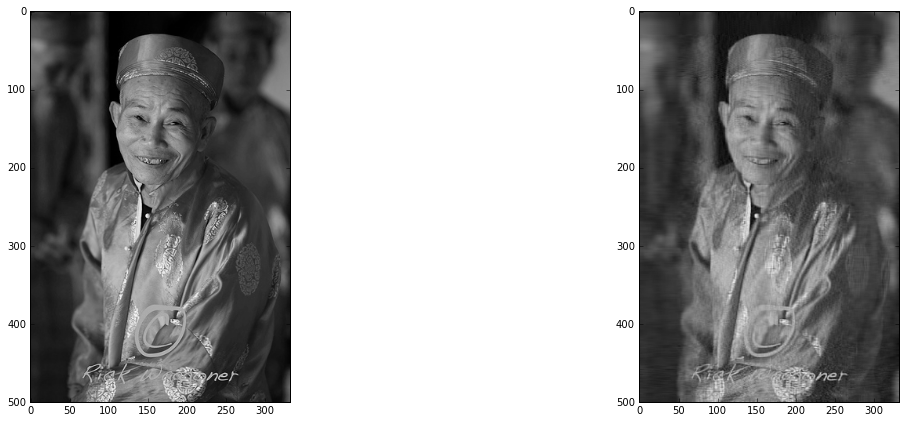

PSNR Value is:  29.289991909264998


In [20]:
run_svd(name_dict,5000,count,50)

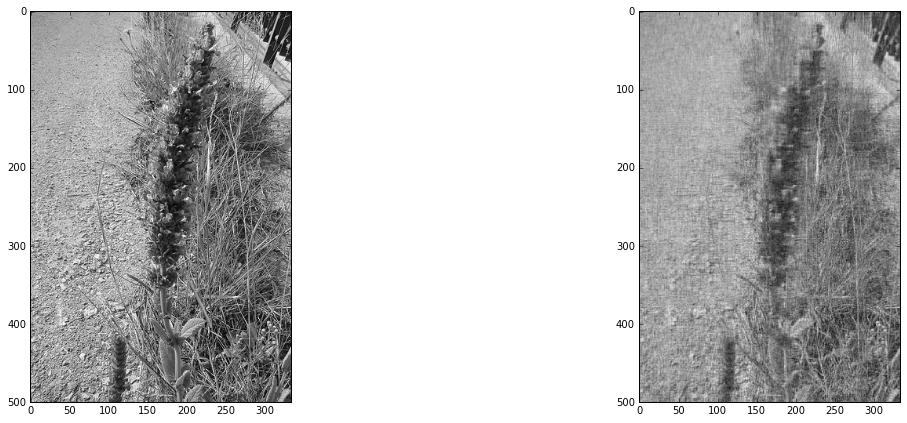

PSNR Value is:  18.71264668455684


In [21]:
run_svd(name_dict,6000,count,50)

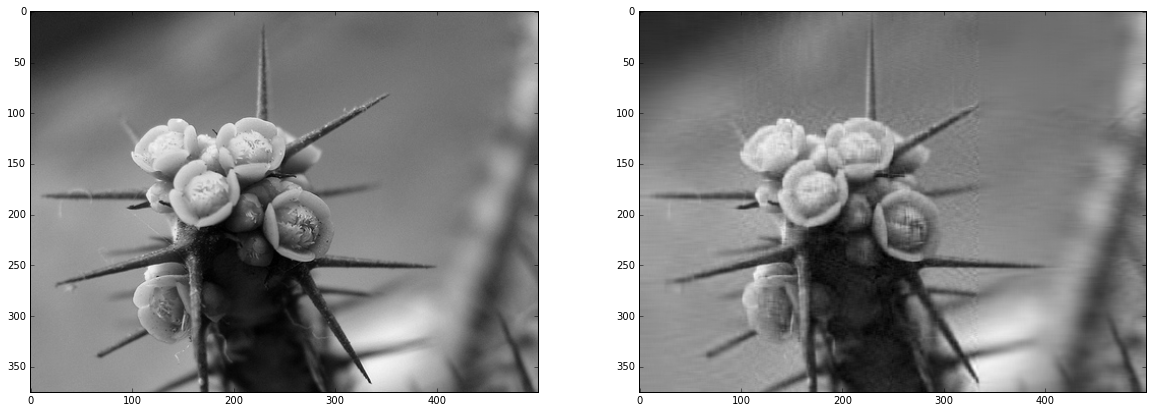

PSNR Value is:  33.16688787931922


In [22]:
run_svd(name_dict,7000,count,50)

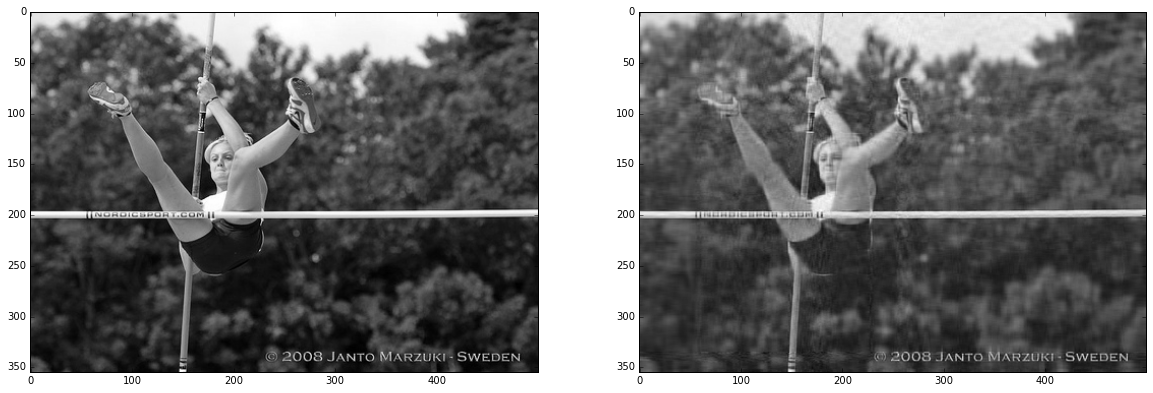

PSNR Value is:  29.558423268214746


In [23]:
run_svd(name_dict,8000,count,50)

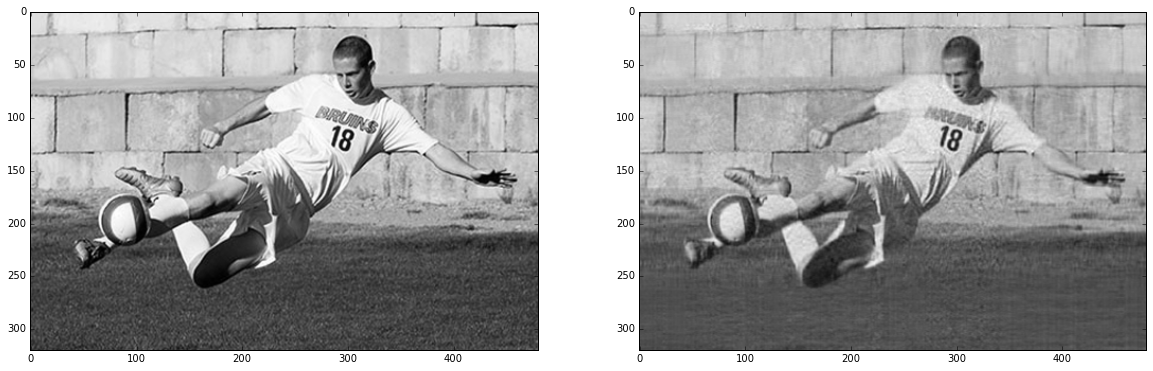

PSNR Value is:  27.488077967250778


In [24]:
run_svd(name_dict,8200,count,50)

# Variation of compression quality with varying K

In [30]:
def plot_n_images(before, after_1, after_2, after_3, after_4, after_5):
    plt.figure(12, figsize=(30, 20))

    plt.subplot(1,6,1)
    imshow(before, cmap = plt.get_cmap('gray'))

    plt.subplot(1,6,2)
    imshow(after_1, cmap = plt.get_cmap('gray'))

    plt.subplot(1,6,3)
    imshow(after_2, cmap = plt.get_cmap('gray'))
    
    plt.subplot(1,6,4)
    imshow(after_3, cmap = plt.get_cmap('gray'))
    
    plt.subplot(1,6,5)
    imshow(after_4, cmap = plt.get_cmap('gray'))
    
    plt.subplot(1,6,6)
    imshow(after_5, cmap = plt.get_cmap('gray'))
    
    plt.show()

    print('PSNR Value for K=10 is: ', psnr(np.asarray(before),after_1))
    print('PSNR Value for K=30 is: ', psnr(np.asarray(before),after_2))
    print('PSNR Value for K=55 is: ', psnr(np.asarray(before),after_3))
    print('PSNR Value for K=80 is: ', psnr(np.asarray(before),after_4))
    print('PSNR Value for K=100 is: ', psnr(np.asarray(before),after_5))

In [26]:
k_list = [10, 30, 55, 80, 100]
after_list = []
input_img = None

for i in range(len(k_list)):
    input_img = get_image_for_index(8000, name_dict)
    D,X = calculate_KSVD_for_Image(input_img,k_list[i])

    if D == 'Error' or X == 'Error':
        print('Error Occurred')
    else:
        reconst_img = np.dot(D,X)
        reconst_img = reconst_img * 255.0
        input_img = input_img * 255.0
        after_list.append(reconst_img)

As you can see from the images plotted below, compression quality(psnr values and the image itself) improves with the increasing value of k

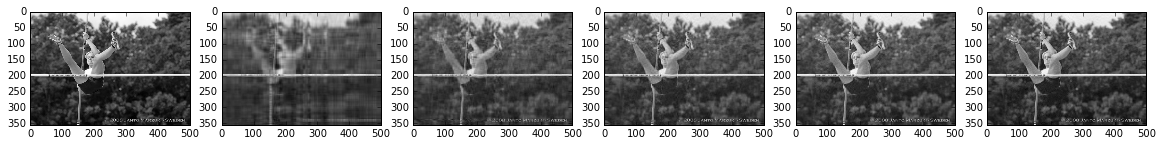

PSNR Value for K=10 is:  21.90701462329673
PSNR Value for K=30 is:  26.64289244054688
PSNR Value for K=55 is:  29.844940851844406
PSNR Value for K=80 is:  32.23865687115953
PSNR Value for K=100 is:  33.585473954940696


In [31]:
plot_n_images(input_img, after_list[0], after_list[1], after_list[2], after_list[3], after_list[4])